In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')


In [ ]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
# Shape of dataset

df.shape 

(51717, 17)

In [ ]:
#check missing value 
%matplotlib inline

def missing_values(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize = 20, weight = 'bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, f'Columns with more than {thresh}% missing values', fontsize = 12, color = 'crimson',
         ha = 'left' ,va = 'top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha = 'left' ,va = 'top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

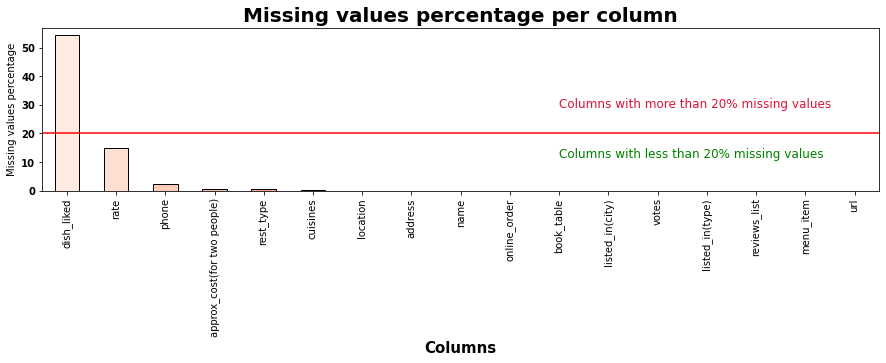

In [ ]:
missing_values(df, thresh = 20, color = sns.color_palette('Reds',15))

In [ ]:
# There are some extra columns so we remove them

col = ['url', 'address', 'phone', 'dish_liked', 'menu_item']

df.drop(col, inplace=True, axis=1)

In [ ]:
# Printing the column names

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
# Fixing column names 

df = df.rename(columns={'approx_cost(for two people)':'approx_cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'reviews_list', 'type', 'city'],
      dtype='object')

In [ ]:
# To find the datatype of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   reviews_list  51717 non-null  object
 10  type          51717 non-null  object
 11  city          51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [ ]:
# To check whether there are duplicate records

duplicate=df[df.duplicated()] 
duplicate

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",Dine-out,Bannerghatta Road
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Bellandur
7599,Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...",Delivery,Brookefield
9342,Healthy Parathawala,Yes,No,NEW,0,BTM,Quick Bites,North Indian,200,[],Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...
46553,House Of Candy,Yes,No,NaN,0,Malleshwaram,Confectionery,Desserts,200,[],Delivery,Rajajinagar
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,"[('Rated 4.0', 'RATED\n A perfect place to dr...",Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Sarjapur Road
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,[],Delivery,Whitefield


In [ ]:
# Remove duplicate records except the first occurence

df.drop_duplicates(inplace=True)

In [ ]:
# Unique values in rate

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
# Removing '/5' from rate

def filter_rate(val):
    if (val=='-' or val=='NEW'):
        return np.nan
    else:
        val=str(val).split('/')[0] # e.g 4.3/5 -> ['4.3', '5'] -> float(4.3) -> 4.3
    return float(val)

df['rate']=df['rate'].apply(filter_rate)

df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51645, dtype: float64

In [ ]:
# Unique values in approx_cost

df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
# Replace , with '' and converting its datatype to float

df['approx_cost'] = df['approx_cost'].str.replace(',', '').astype(float)
df['approx_cost']


0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost, Length: 51645, dtype: float64

In [ ]:
df.describe() 


,rate,votes,approx_cost
count,41622.000000,51645.000000,51300.000000
mean,3.700526,283.968555,555.552144
std,0.440598,804.317863,438.962830
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [ ]:
# Check for null values

df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10023
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       345
reviews_list        0
type                0
city                0
dtype: int64

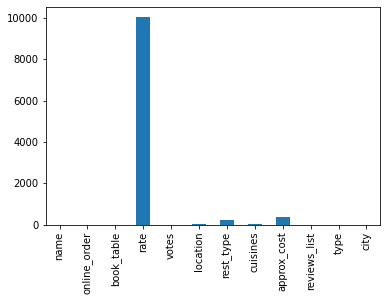

In [ ]:
df.isnull().sum().plot(kind='bar');


In [ ]:
df['rate'].fillna(df['rate'].mean(),inplace=True)


In [ ]:
## Remove duplicate records except the first occurence

df.dropna(inplace=True)


In [ ]:
df.isnull().sum()


name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
reviews_list    0
type            0
city            0
dtype: int64

In [ ]:
#Making a new column for total number of cuisines offered by each restaurant 
df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
df


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city,Number_of_cuisines_offered
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,2
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,1
51713,Vinod Bar And Restaurant,No,No,3.700526,0,Whitefield,Bar,Finger Food,600.0,[],Pubs and bars,Whitefield,1
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700526,0,Whitefield,Bar,Finger Food,2000.0,[],Pubs and bars,Whitefield,1
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,1


In [ ]:
#3.Data Visualizations
plt.style.use('seaborn') # adding some styling to our plots 


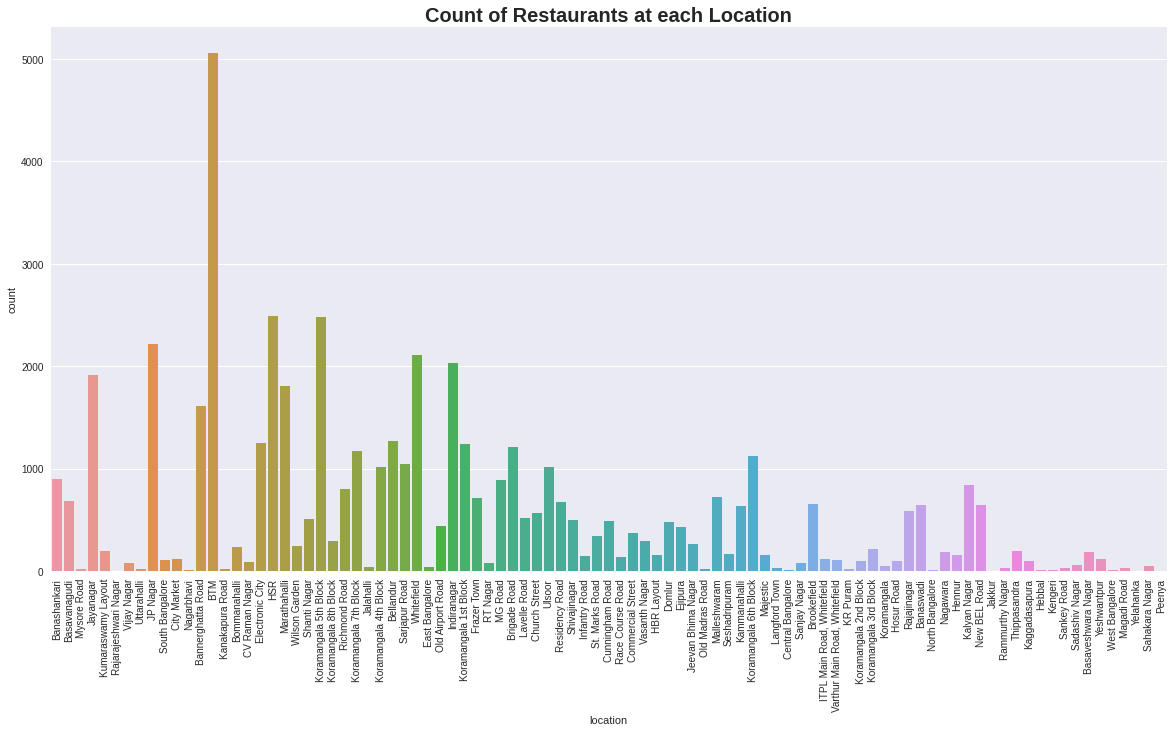

In [ ]:
# Countplot of location

plt.figure(figsize=(20,10))
sns.countplot(x='location', data=df)
plt.title('Count of Restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("location \t\t count")
df["location"].value_counts()

location 		 count


BTM                      5056
HSR                      2495
Koramangala 5th Block    2480
JP Nagar                 2218
Whitefield               2106
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

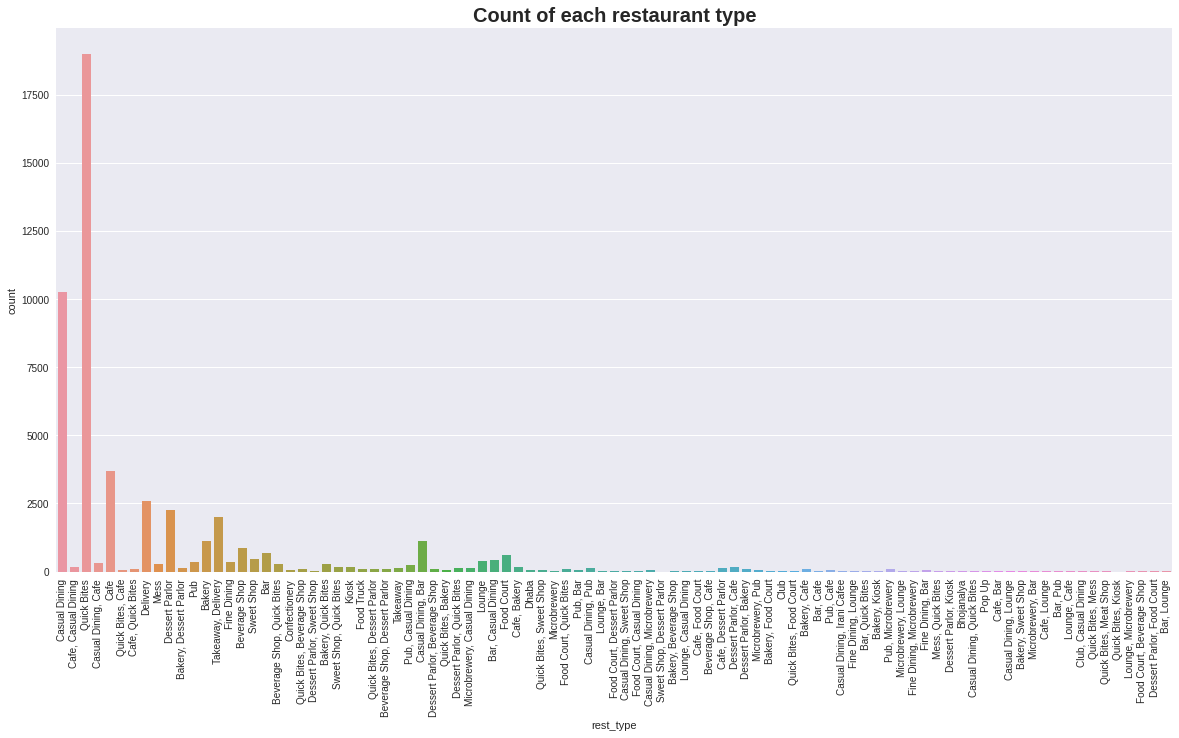

In [ ]:
# Bar plot of rest_type

plt.figure(figsize=(20,10))
sns.countplot(x='rest_type', data=df)
plt.xticks(rotation=90)
plt.title('Count of each restaurant type', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
print("rest_type\t\t\tcount")
df["rest_type"].value_counts()

rest_type			count


Quick Bites                   19015
Casual Dining                 10259
Cafe                           3685
Delivery                       2574
Dessert Parlor                 2243
                              ...  
Bakery, Food Court                2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

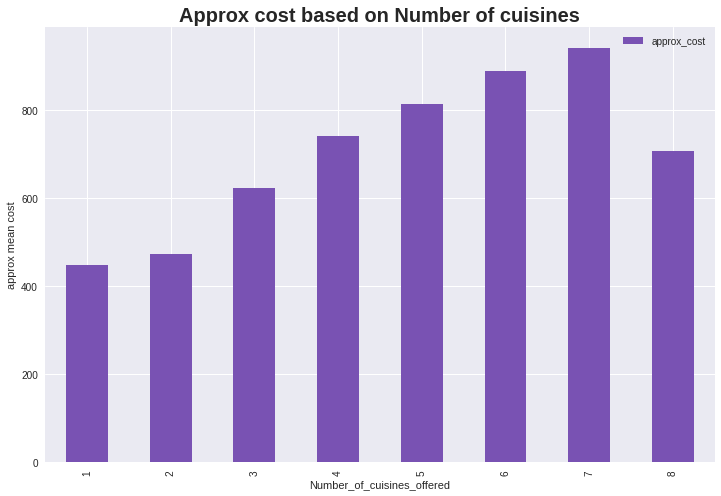

In [ ]:
# Grouping by number of cuisines offered and finding the mean of approx_cost for each cuisine 
a = df.groupby('Number_of_cuisines_offered').agg({'approx_cost':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#7952B3')
plt.title('Approx cost based on Number of cuisines', fontsize=20, fontweight='bold')
plt.ylabel('approx mean cost')
plt.legend()
plt.show()

In [ ]:
print("no\tcount")

df['Number_of_cuisines_offered'].value_counts()

no	count


2    17713
1    12209
3    12078
4     5827
5     2018
6      673
7      369
8      190
Name: Number_of_cuisines_offered, dtype: int64

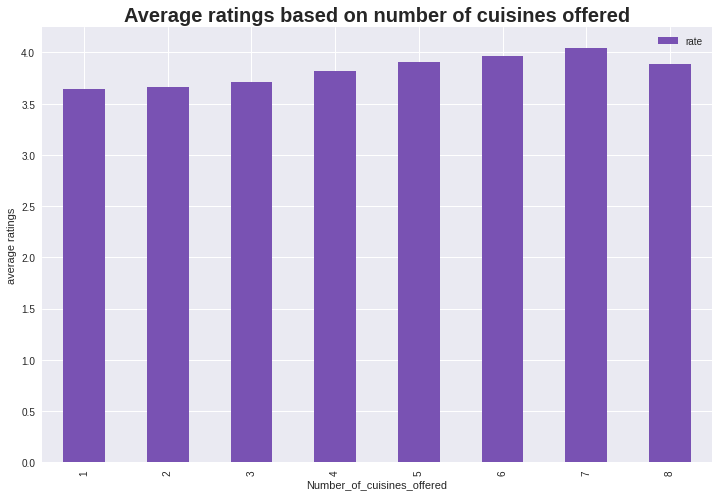

In [ ]:
# Grouping by number of cuisines offered and finding the mean of approx_cost for each cuisine 
a = df.groupby('Number_of_cuisines_offered').agg({'rate':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#7952B3')
plt.title('Average ratings based on number of cuisines offered', fontsize=20, fontweight='bold')
plt.ylabel('average ratings')
plt.legend()
plt.show()

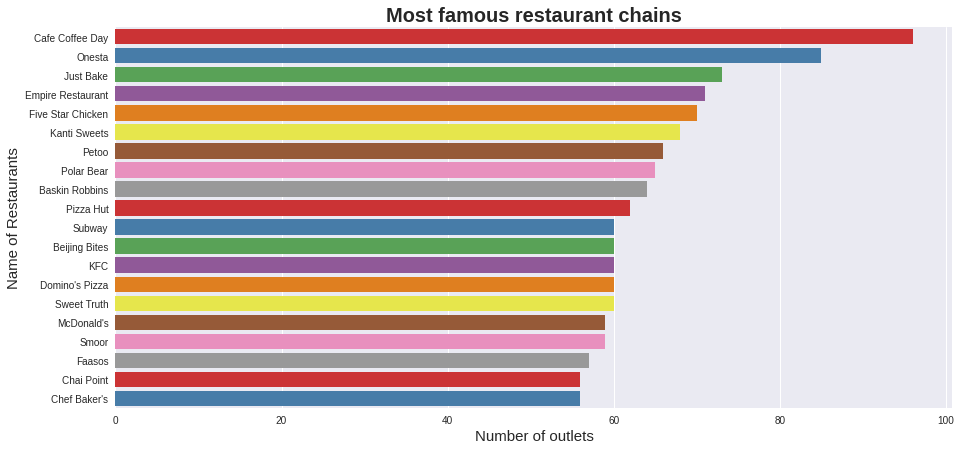

In [ ]:
# 20 Most famous restaurant chains

plt.figure(figsize=(15,7))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette='Set1')
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.title("Most famous restaurant chains", fontsize=20, fontweight='bold')
plt.show()

In [ ]:
df[["online_order", "book_table"]]


,online_order,book_table
0,Yes,Yes
1,Yes,No
2,Yes,No
3,No,No
4,No,No
...,...,...
51712,No,No
51713,No,No
51714,No,No
51715,No,Yes


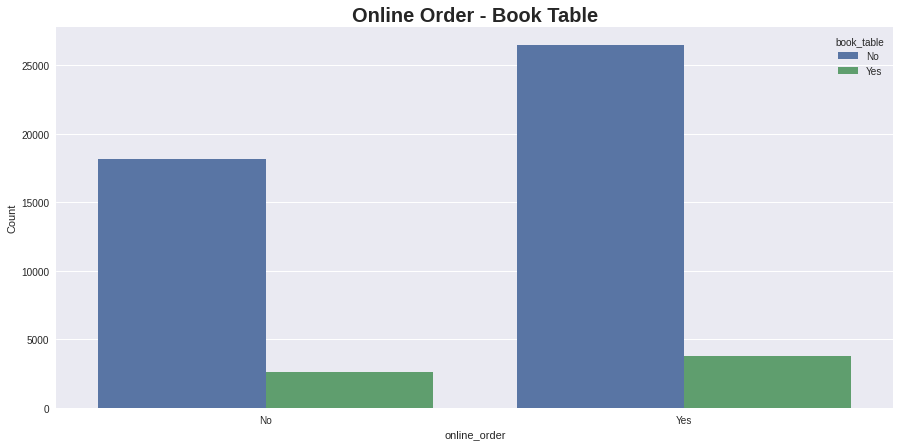

In [ ]:
df_online_booking = df.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (15,7))
sns.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=20, fontweight='bold')
plt.show()

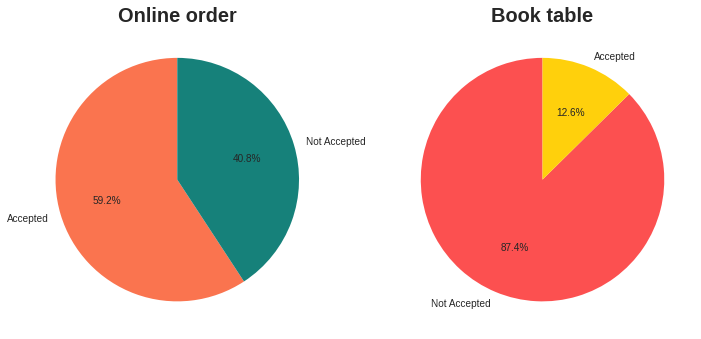

In [ ]:
label1 = ["Accepted",'Not Accepted']
label2 = ['Not Accepted', "Accepted"]

df_online = df['online_order'].value_counts().values
df_table = df['book_table'].value_counts().values

fig, ax1 = plt.subplots(nrows=1, ncols=2)

color1 = ['#FA744F', '#16817A']
color2 = ['#FC5050', '#FFD00C']

ax1[0].pie(df_online, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('Online order', fontsize=20, fontweight='bold')

ax1[1].pie(df_table, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Book table', fontsize=20, fontweight='bold')
plt.show()

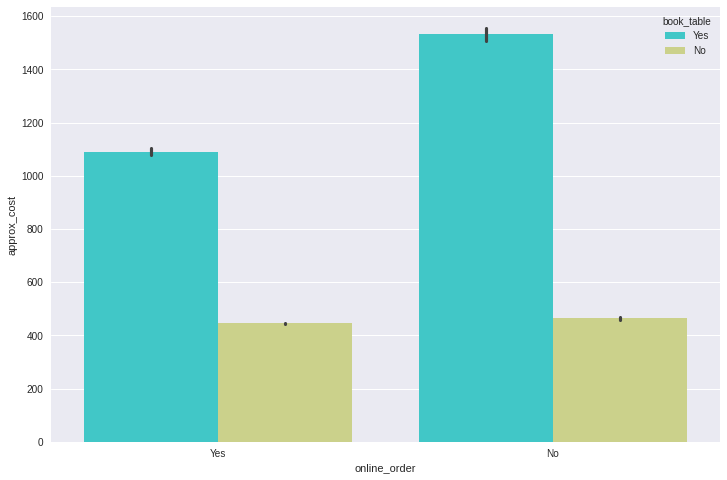

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='online_order', y='approx_cost', hue='book_table', palette='rainbow')
plt.show()

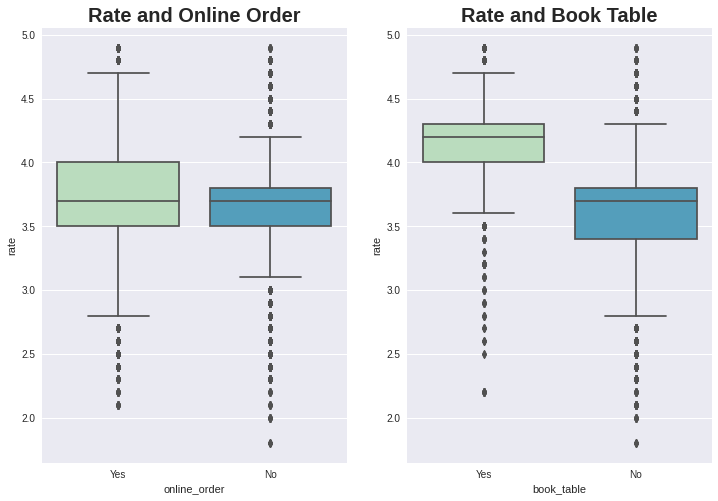

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=2)

plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='online_order', y='rate', palette='GnBu', ax=ax1[0]);
ax1[0].set_title('Rate and Online Order', fontsize=20, fontweight='bold')

plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='book_table', y='rate', palette='GnBu', ax=ax1[1]);
ax1[1].set_title('Rate and Book Table', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
fig = px.box(df,x='online_order',y='approx_cost', title='Approx cost and Online Order')
fig.show()

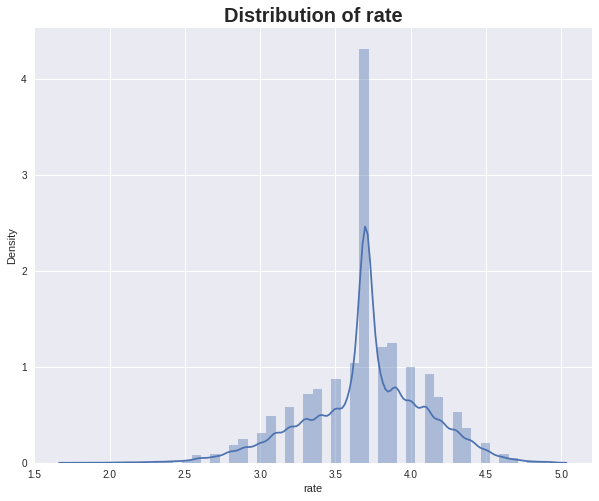

In [ ]:
# Density plot to visualize rate

plt.figure(figsize = (10, 8))
sns.distplot(df['rate'])
plt.title("Distribution of rate", fontsize=20, fontweight='bold')
plt.show()

In [ ]:
a.sort_values("approx_cost", ascending=False)


,approx_cost
location,
Sankey Road,2505.555556
Race Course Road,1309.352518
Lavelle Road,1307.965451
MG Road,1155.704698
Infantry Road,1060.666667
...,...
Ejipura,320.506912
CV Raman Nagar,311.235955
Yelahanka,310.000000


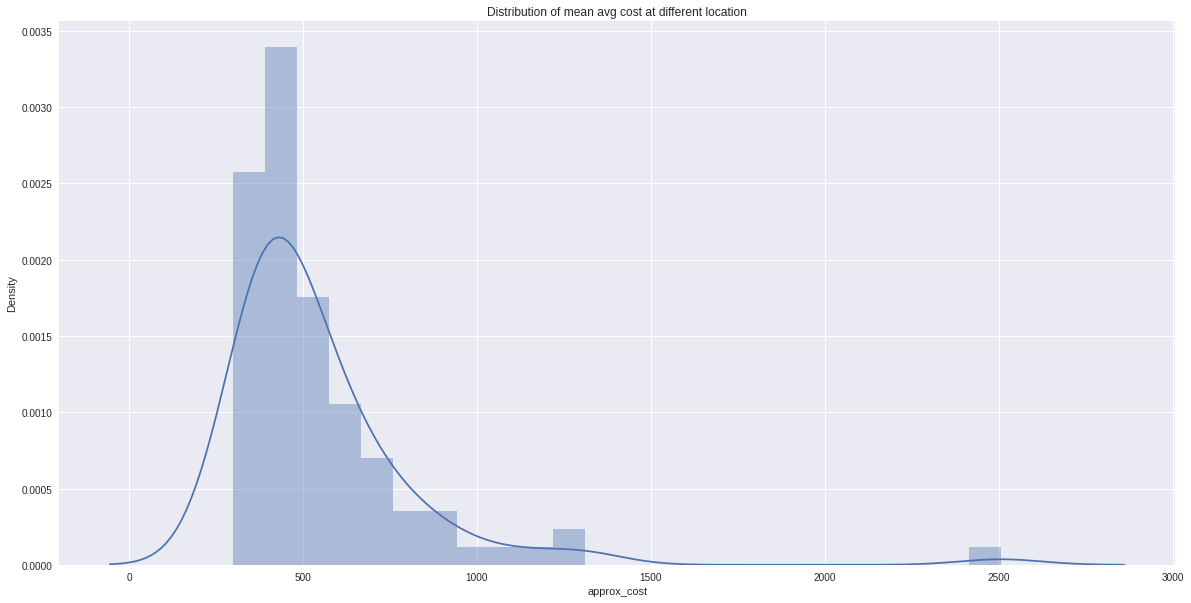

In [ ]:
plt.title("Distribution of mean avg cost at different location")
sns.distplot(a["approx_cost"]);

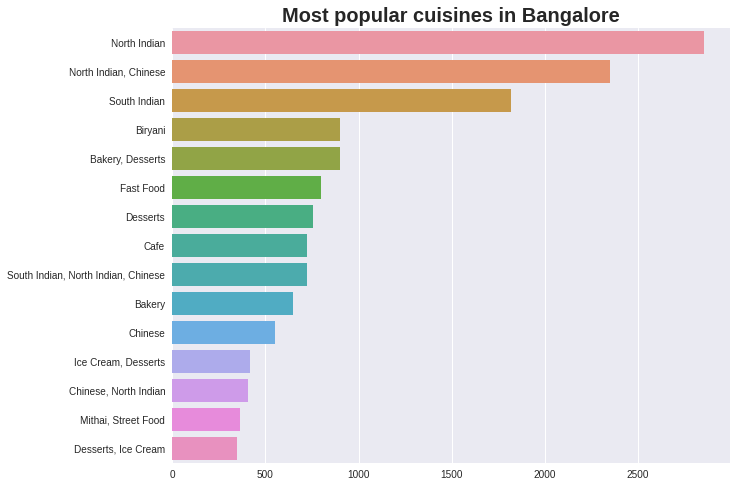

In [ ]:
# 15 most popular cuisines in Bangalore

plt.figure(figsize=(10,8))
df_cuisines = df['cuisines'].value_counts()[:15]
sns.barplot(x = df_cuisines.values, y=df_cuisines.index)
plt.title('Most popular cuisines in Bangalore', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
df["votes"] 


0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51077, dtype: int64

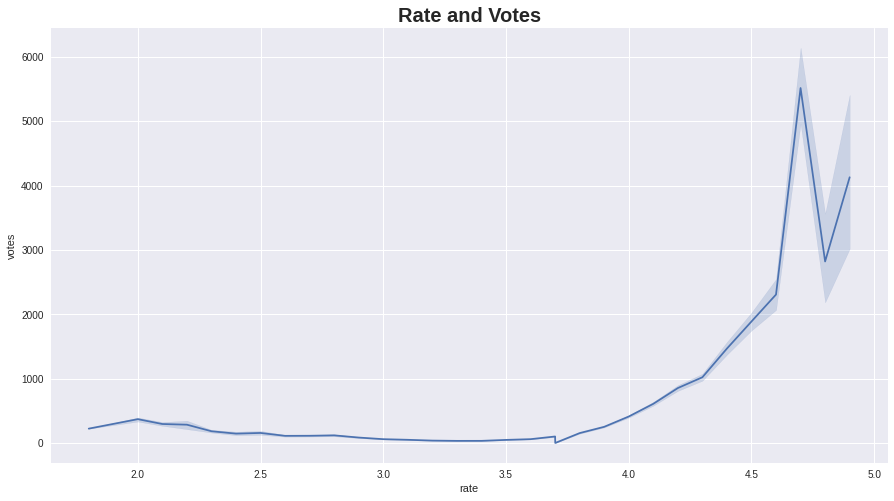

In [ ]:
# Relation of rate and votes

plt.figure(figsize=(15,8))
sns.lineplot(x='rate', y='votes', data=df)
plt.title('Rate and Votes', fontsize=20, fontweight='bold')
plt.show()

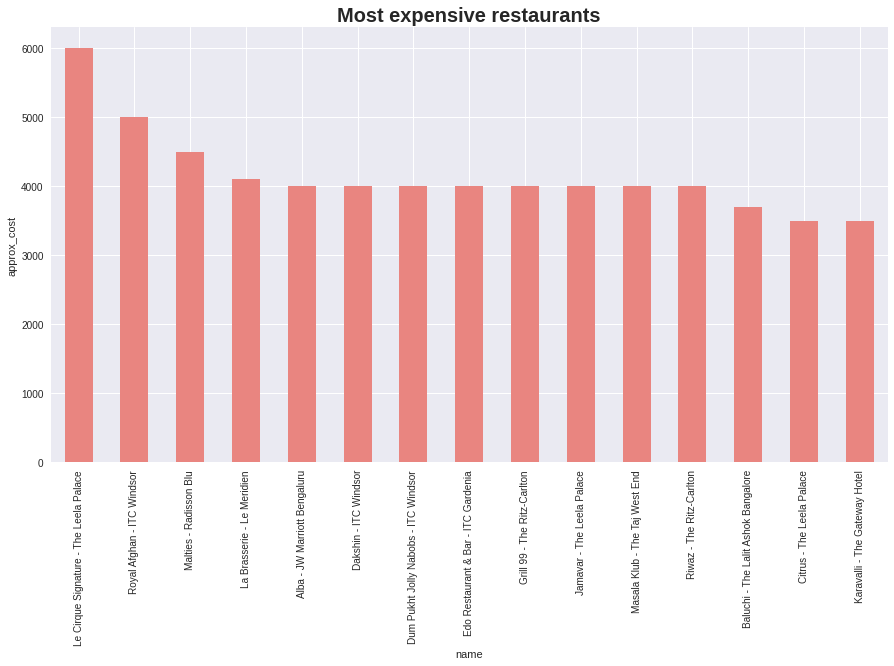

In [ ]:
#15 Most expensive restaurants
plt.figure(figsize=(15,8))
df.groupby('name')['approx_cost'].max().nlargest(15).plot.bar(color='#E98580')
plt.title('Most expensive restaurants', fontsize=20, fontweight='bold')
plt.ylabel('approx_cost')
plt.xticks(rotation=90)
plt.show()